# Итоговый проект.

Анализ личности клиента — это подробный анализ клиентов компании. Он помогает компании лучше понять своих клиентов и облегчает изменение продукции в соответствии со специфическими потребностями, поведением различных типов клиентов.

Анализ личности клиента помогает компании модифицировать свой продукт в соответствии с целевыми потребителями из различных сегментов потребителей. Например, вместо того, чтобы тратить деньги на маркетинг нового продукта для каждого клиента в базе данных компании, компания может проанализировать, какой сегмент клиентов с наибольшей вероятностью купит продукт, и затем продвигать продукт только для этого сегмента.

Описание столбцов:

|Название| Описание |
|--|--|
|ID| Уникальный идентификатор клиента|
|Year_Birth| Год рождения клиента|
|Education | Уровень образования клиента|
|Marital_Status| Семейное положение клиента|
|Income| Годовой доход семьи клиента|
|Kidhome| Количество детей в семье клиента|
|Teenhome| Количество подростков в домохозяйстве клиента|
|Dt_Customer| Дата регистрации клиента в компании|
|Recency| Количество дней с момента последней покупки клиента|
|Complain| 1, если клиент жаловался в течение последних 2 лет, 0 —  в противном случае|
|MntWines|  Сумма, потраченная на вино за последние 2 года|
|MntFruits| Сумма, потраченная на фрукты за последние 2 года|
|MntMeatProducts| Сумма, потраченная на мясо за последние 2 года|
|MntFishProducts| Сумма, потраченная на рыбу за последние 2 года|
|MntSweetProducts| Сумма, потраченная на сладости за последние 2 года|
|MntGoldProds| Сумма, потраченная на золото за последние 2 года|
|NumDealsPurchases| Количество покупок, совершенных со скидкой|
|AcceptedCmp1| 1, если клиент принял предложение в 1-й кампании, 0 — иначе|
|AcceptedCmp2| 1, если клиент принял предложение во 2-й компании, 0 — иначе|
|AcceptedCmp3| 1, если клиент принял предложение в 3-й кампании, 0 — иначе|
|AcceptedCmp4| 1, если клиент принял предложение в 4-й кампании, 0 — иначе|
|AcceptedCmp5| 1, если клиент принял предложение в 5-й кампании, 0 — иначе|
|Response| 1, если клиент принял предложение в последней кампании, 0 — иначе|
|NumWebPurchases| Количество покупок, совершенных через веб-сайт компании|
|NumCatalogPurchases| Количество покупок, сделанных с помощью каталога|
|NumStorePurchases| Количество покупок, сделанных непосредственно в магазинах|
|NumWebVisitsMonth| Количество посещений веб-сайта компании за последний месяц|

## Задание

Проведите полный цикл анализа данных (EDA), что проходили ранее. Этапы выполнения задания (наш pipeline):

1. Загрузка и предобработка данных. Очистить данные и удалить/заполнить пропуски.
2. Описательный анализ данных, просмотр данных и вывод статистик
3. Постройте необходимые графики для анализа
4. Проверьте гипотезы
5. Сделайте отчет-вывод по исследованию

Что хочет узнать заказчик?

1. Сколько в среднем клиенты тратят на каждый тип товара? На какой товар надо сделать акцент?
2. Какой средний возраст покупателя? Зависит ли возраст клиента от его покупок во всех категориях?
3. Тратят ли клиент больше денег, если у него много детей и иждивенцев?
4. Зависят ли покупки от образования? Что предпочитают люди чаще покупать в зависимости от образования?
5. Женатые люди тратят больше или меньше денег на покупку золота?
6. Люди, которые покупают товар на сайте чаще берут что-то со скидкой?
7. Зависит ли жалоба клиента от его трат?
8. Люди, принявшие предложение о покупке лишь в последней компании тратят больше, чем люди, принявшие сразу предложение первой компании?

**ЗАДАНИЕ ПРО**

1. Разбейте данные на несколько выборок: по образованию, по уровню заработка и по семейному статусу. Опишите все эти выборки и скажите — отличаются ли они между собой? Опишите общие закономерности для каждого типа — на что чаще тратит женатый человек и жалуется ли он? Люди с PhD покупают фрукты? И тд
2. Разбейте данные на две выборки — по сумме трат каждого товара: 1 — больше медианы трат, 0— меньше. Сравните выборки между собой и сделайте вывод — на кого надо опираться при модификации товаров магазинам?
3. Проведите дополнительный анализ, который поможет дать больше информации для заказчика.

## Загрузка данных

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go

from scipy.stats import shapiro

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/W1llAnn/1tdata-homework/main/1.7marketing_campaign.csv', sep='\t')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [5]:
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(' ', '_')

Описание всех колонок мы видим выше

## Описательный анализ данных

Рассмотрите данные — изучите медианы, средние, дисперсии и т.д. 

Что можете сказать о данных? Сделайте вывод.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   2240 non-null   int64  
 1   year_birth           2240 non-null   int64  
 2   education            2240 non-null   object 
 3   marital_status       2240 non-null   object 
 4   income               2216 non-null   float64
 5   kidhome              2240 non-null   int64  
 6   teenhome             2240 non-null   int64  
 7   dt_customer          2240 non-null   object 
 8   recency              2240 non-null   int64  
 9   mntwines             2240 non-null   int64  
 10  mntfruits            2240 non-null   int64  
 11  mntmeatproducts      2240 non-null   int64  
 12  mntfishproducts      2240 non-null   int64  
 13  mntsweetproducts     2240 non-null   int64  
 14  mntgoldprods         2240 non-null   int64  
 15  numdealspurchases    2240 non-null   i

Опишем наш датафрейм в общем:
*   Всего 2240 строки, пустые строки (NaN) в столбцах Income
*   Всего 29 колонок. Из них со значениями float64 1 колонка, int64 25 колонок, object 3 колонки
*   Объем занимаемый датафреймом 507.6+ KB

Рассмотрим статистику для числовых данных:

In [7]:
pd.set_option('display.max_columns', None)

In [8]:
df.describe()

,id,year_birth,income,kidhome,teenhome,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,z_costcontact,z_revenue,response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


*   В ID пользователя все значения уникальные, это правильно так как это индетефикатор пользователя
*   Год рождения клиента (Year_Birth) - среднее значение 1969 год, медиана 1970 год. Однако есть минимальное значение 1893, а максимальное 1996. 
*   Годовой доход семьи клиента (Income) - Среднее значение 52247.25
*   Количество детей в семье клиента (Kidhome) - медиана 0 говорит о том, что в "среднем" по выборке у клиентов нет детей
*   Количество подростков в домохозяйстве клиента (Teenhome) - медиана 0 говорит о том, что в "среднем" по выборке у клиентов подростков в домохозяйстве
*   Количество дней с момента последней покупки клиента (Recency) - в среднем 49 дней
*   Сумма, потраченная на вино за последние 2 года (MntWines) - в среднем 304, а медиана 173. Т.е. половина клиентов потратила больше 173, а другая половина меньше
*   Сумма, потраченная на фрукты за последние 2 года (MntFruits) - в среднем 26.3, а медиана 8. Т.е. половина клиентов потратила больше 8, а другая половина меньше
*   Сумма, потраченная на мясо за последние 2 года (MntMeatProducts) - в среднем 166.95, а медиана 67. Т.е. половина клиентов потратила больше 67, а другая половина меньше
*   Сумма, потраченная на рыбу за последние 2 года (MntFishProducts) - в среднем 37.53, а медиана 12. Т.е. половина клиентов потратила больше 12, а другая половина меньше
*   Сумма, потраченная на сладости за последние 2 года (MntSweetProducts) - в среднем 27.06, а медиана 8. Т.е. половина клиентов потратила больше 8, а другая половина меньше
*   Сумма, потраченная на золото за последние 2 года (MntGoldProds) - в среднем 44, а медиана 24. Т.е. половина клиентов потратила больше 24, а другая половина меньше
*   Количество покупок, совершенных со скидкой (NumDealsPurchases) - в среднем 2 покупки 
*   Количество покупок, совершенных через веб-сайт компании (NumWebPurchases) - в среднем 4 покупки
*   Количество покупок, сделанных с помощью каталога (NumCatalogPurchases) - в среднем 2 покупки
*   Количество покупок, сделанных непосредственно в магазинах (NumStorePurchases) - в среднем 5 покупок
*   Количество посещений веб-сайта компании за последний месяц (NumWebVisitsMonth) - в среднем 5 посещений
*   В среднем люди отдавали предпочтение AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, AcceptedCmp1, чем AcceptedCmp1
*   1, если клиент жаловался в течение последних 2 лет, 0 — в противном случае (Complain) - в большинстве клиенты не жаловались
*   1, если клиент принял предложение в последней кампании, 0 — иначе (Response) - чуть чаще клиенты принимали предложение, чем в AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, AcceptedCmp1

И для object:

In [9]:
df.describe(include='object')

,education,marital_status,dt_customer
count,2240,2240,2240
unique,5,8,663
top,Graduation,Married,31-08-2012
freq,1127,864,12


*   Уровень образования клиента (Education) - больше всего клиентов, которые закончили только колледж
*   Семейное положение клиента (Marital_Status) - больше всего было женатых клиентов
*   Дата регистрации клиента в компании (Dt_Customer) - Чаще встречается 31-08-2012

**Вывод:**

В среднем по выборке клиентами являются люди 1969 года, также клиенты без детей или подростков, при этом большая часть клиентов женаты(замужем). Большая часть клиентов из выборки закончила колледж. В среднем последние покупки были 49 дней назад и больше клиенты отдавали денег за вино и мясо, меньше денег было потрачено на золото, фрукты, рыбу и сладости. Чаще покупки совершались в магазине или через сайт. Большая часть клиентов не оставляла жалобы.
Чаще клиенты принимали предложение в последней кампании, чем в остальных 5.

## Предобработка данных

### Дубликаты

Предобработайте датасет — проверьте на наличие дубликатов и удалите, если они есть.

In [10]:
duplicateRows = df[df.duplicated ()]
duplicateRows

,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,z_costcontact,z_revenue,response


Дубликаты отсутствуют

### Отсутствующие значения

Предобработайте датасет — проверьте на наличие NaN и удалите или заполните значения.

In [11]:
df.isnull().sum()

id                      0
year_birth              0
education               0
marital_status          0
income                 24
kidhome                 0
teenhome                0
dt_customer             0
recency                 0
mntwines                0
mntfruits               0
mntmeatproducts         0
mntfishproducts         0
mntsweetproducts        0
mntgoldprods            0
numdealspurchases       0
numwebpurchases         0
numcatalogpurchases     0
numstorepurchases       0
numwebvisitsmonth       0
acceptedcmp3            0
acceptedcmp4            0
acceptedcmp5            0
acceptedcmp1            0
acceptedcmp2            0
complain                0
z_costcontact           0
z_revenue               0
response                0
dtype: int64

In [12]:
df['income'] = df['income'].fillna(df['income'].median())

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   2240 non-null   int64  
 1   year_birth           2240 non-null   int64  
 2   education            2240 non-null   object 
 3   marital_status       2240 non-null   object 
 4   income               2240 non-null   float64
 5   kidhome              2240 non-null   int64  
 6   teenhome             2240 non-null   int64  
 7   dt_customer          2240 non-null   object 
 8   recency              2240 non-null   int64  
 9   mntwines             2240 non-null   int64  
 10  mntfruits            2240 non-null   int64  
 11  mntmeatproducts      2240 non-null   int64  
 12  mntfishproducts      2240 non-null   int64  
 13  mntsweetproducts     2240 non-null   int64  
 14  mntgoldprods         2240 non-null   int64  
 15  numdealspurchases    2240 non-null   i

Мы уберем из выборки ID, Z_CostContact, Z_Revenue

In [14]:
df.drop(['id', 'z_costcontact', 'z_revenue'], axis= 1 , inplace= True )

### Изменение типа данных

Рассмотрев все данные, замените типы на нужные (при необходимости):

- Если есть числа — на `int` или `float`
- Если категории — можно оставить `object`

In [15]:
df_transform = df.copy()

Мы будем переводить Education, Marital_Status, так как они понадобятся нам для поиска корреляции

In [16]:
df_transform['education'].value_counts()

education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64

In [17]:
df_transform = pd.get_dummies(df_transform, columns=['education'], dtype=int)

In [18]:
df_transform['marital_status'].value_counts()

marital_status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

Будем считать, что Single = Alone, Absurd, YOLO

In [19]:
df_transform = df_transform.replace(['Alone', 'Absurd', 'YOLO'],'Single')

In [20]:
df_transform = pd.get_dummies(df_transform, columns=['marital_status'], dtype=int)

In [21]:
df_transform.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   year_birth               2240 non-null   int64  
 1   income                   2240 non-null   float64
 2   kidhome                  2240 non-null   int64  
 3   teenhome                 2240 non-null   int64  
 4   dt_customer              2240 non-null   object 
 5   recency                  2240 non-null   int64  
 6   mntwines                 2240 non-null   int64  
 7   mntfruits                2240 non-null   int64  
 8   mntmeatproducts          2240 non-null   int64  
 9   mntfishproducts          2240 non-null   int64  
 10  mntsweetproducts         2240 non-null   int64  
 11  mntgoldprods             2240 non-null   int64  
 12  numdealspurchases        2240 non-null   int64  
 13  numwebpurchases          2240 non-null   int64  
 14  numcatalogpurchases     

Добавим новый столбец: Итого потрачено в компании

In [22]:
df_transform = df_transform.assign(cost=df_transform['mntwines'] + df_transform['mntfruits'] + df_transform['mntmeatproducts'] + df_transform['mntfishproducts'] + df_transform['mntsweetproducts'] + df_transform['mntgoldprods'])

In [23]:
df_transform.columns = df_transform.columns.str.lower()
df_transform.columns = df_transform.columns.str.replace(' ', '_')

**Вывод:**

Мы перевели с помощью get_dummies Education, Marital_Status, так как они понадобятся нам для поиска корреляции. Конечно, мы могли Education перевести через другой метод, так как явно существуют уровни образования, но данных что стоит выше, а что ниже я не нашла

## Визуализация

Посмотрим нормальность распределения данных по выборке:

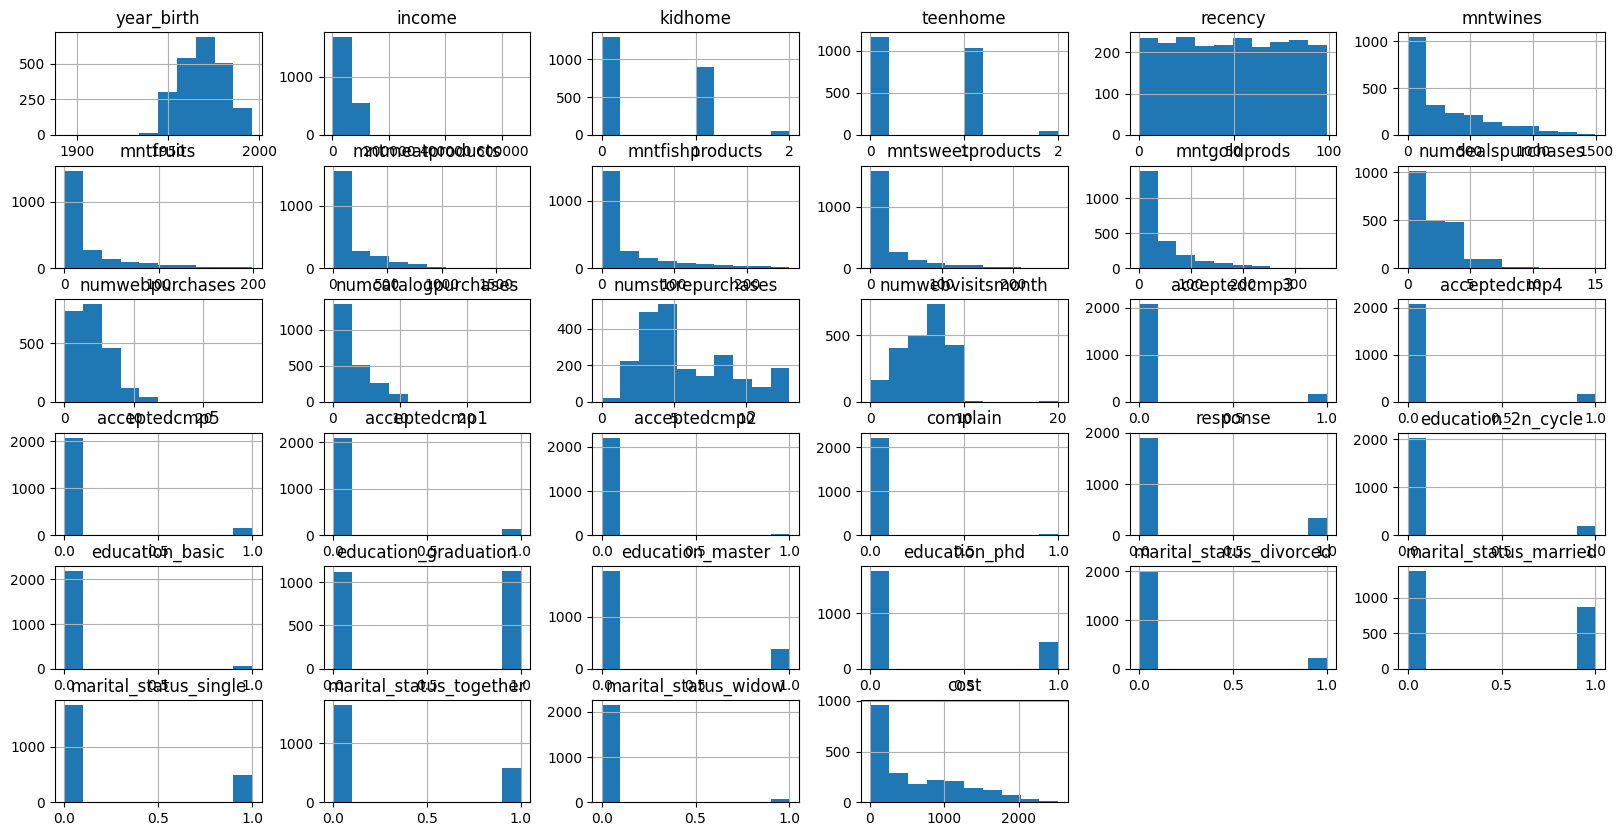

In [106]:
df_transform.hist(figsize=(20,10))

Количество дней с момента последней покупки клиента (recency) имеет равномерное распределение.

ShapiroResult(statistic=0.9757195115089417, pvalue=4.535353233457941e-19)

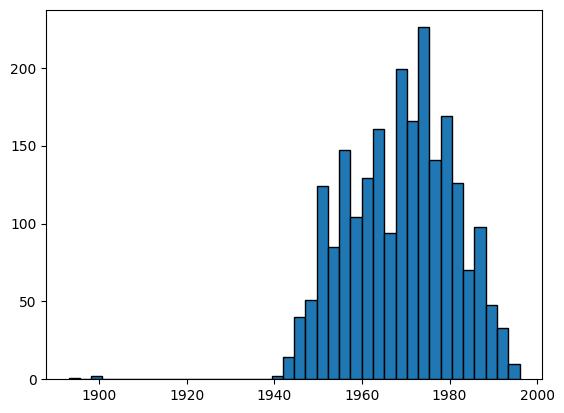

In [104]:
plt.hist(df_transform['year_birth'], edgecolor='black', bins=40)

shapiro(df_transform['year_birth'])

Распределение года рождения, и как следствие, возраста по выборке нельзя считать нормальным

ShapiroResult(statistic=0.7774122357368469, pvalue=0.0)

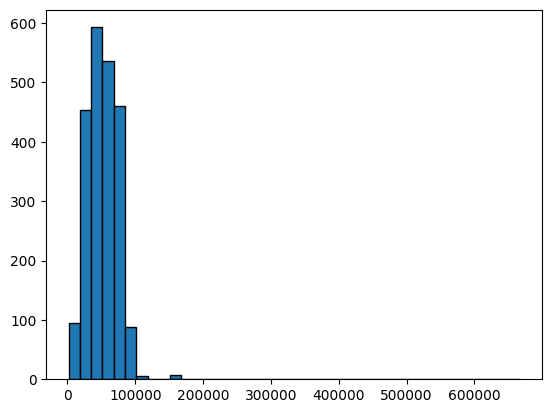

In [58]:
plt.hist(df_transform['income'], edgecolor='black', bins=40)

shapiro(df_transform['income'])

Распределение дохода по выборке нельзя назвать нормальным распределением

Мы можем посмотреть есть мы в выборке выбросы:

<Axes: title={'center': 'Выбросы в income'}>

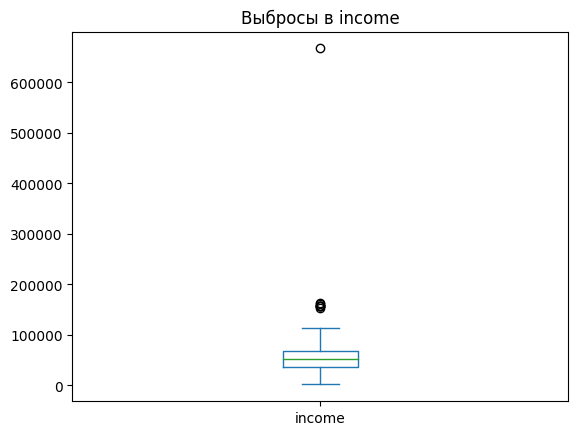

In [104]:
df_transform[['income']].plot.box(title='Выбросы в income')

<Axes: title={'center': 'Выбросы'}>

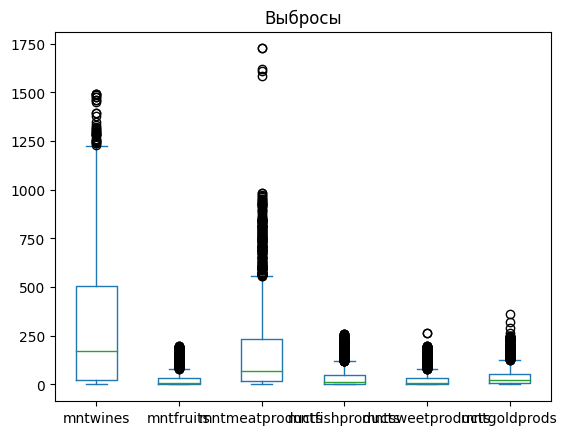

In [103]:
df_transform[['mntwines', 'mntfruits', 'mntmeatproducts', 'mntfishproducts', 'mntsweetproducts', 'mntgoldprods']].plot.box(title='Выбросы')

На boxplot мы можем видеть выбросы в данных

**Вывод:** В данных не нормальное распределение, в данных присутствуют выбросы. Количество дней с момента последней покупки клиента (recency) имеет равномерное распределение.

## Задание от заказчика

1. Сколько в среднем клиенты тратят на каждый тип товара? На какой товар надо сделать акцент?
2. Какой средний возраст покупателя? Зависит ли возраст клиента от его покупок во всех категориях?
3. Тратят ли клиент больше денег, если у него много детей и иждивенцев?
4. Зависят ли покупки от образования? Что предпочитают люди чаще покупать в зависимости от образования?
5. Женатые люди тратят больше или меньше денег на покупку золота?
6. Люди, которые покупают товар на сайте чаще берут что-то со скидкой?
7. Зависит ли жалоба клиента от его трат?
8. Люди, принявшие предложение о покупке лишь в последней компании тратят больше, чем люди, принявшие сразу предложение первой компании?

*Сколько в среднем клиенты тратят на каждый тип товара? На какой товар надо сделать акцент?*

In [105]:
df_transform[['mntwines', 'mntfruits', 'mntmeatproducts', 'mntfishproducts', 'mntsweetproducts', 'mntgoldprods', 'cost']].describe()

,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,cost
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,605.798214
std,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,602.249288
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
25%,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,68.750000
50%,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,396.000000
75%,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,1045.500000
max,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,2525.000000


И по среднему значению и по медиане клиенты больше денег тратят на вино

*Какой средний возраст покупателя? Зависит ли возраст клиента от его покупок во всех категориях?*

In [60]:
df_transform[['year_birth']].describe()

,year_birth
count,2240.000000
mean,1968.805804
std,11.984069
min,1893.000000
25%,1959.000000
50%,1970.000000
75%,1977.000000
max,1996.000000


In [73]:
print(f'Средний возраст клиента {2023-1969} лет/года')

Средний возраст клиента 54 лет/года


In [108]:
age_1 = df_transform[['year_birth', 'mntwines', 'mntfruits', 'mntmeatproducts', 'mntfishproducts', 'mntsweetproducts', 'mntgoldprods', 'cost']]
age_1
age_1.corr()

,year_birth,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,cost
year_birth,1.000000,-0.157773,-0.017917,-0.030872,-0.041625,-0.018133,-0.061818,-0.111306
mntwines,-0.157773,1.000000,0.389637,0.562667,0.399753,0.386581,0.387516,0.891839
mntfruits,-0.017917,0.389637,1.000000,0.543105,0.594804,0.567164,0.392995,0.614229
mntmeatproducts,-0.030872,0.562667,0.543105,1.000000,0.568402,0.523846,0.350609,0.842965
mntfishproducts,-0.041625,0.399753,0.594804,0.568402,1.000000,0.579870,0.422875,0.642818
mntsweetproducts,-0.018133,0.386581,0.567164,0.523846,0.579870,1.000000,0.369724,0.603016
mntgoldprods,-0.061818,0.387516,0.392995,0.350609,0.422875,0.369724,1.000000,0.524262
cost,-0.111306,0.891839,0.614229,0.842965,0.642818,0.603016,0.524262,1.000000


Все, что меньше 0,5 считается не значимой корреляцией. Однако, все коэф.корреляции с отрицательным значением, возможно, что чем старше человек, тем меньше он тратит на продукты в принципе, но разница не значима статистически

*Тратят ли клиент больше денег, если у него много детей и иждивенцев?*

In [109]:
kid = df_transform[['kidhome', 'teenhome', 'mntwines', 'mntfruits', 'mntmeatproducts', 'mntfishproducts', 'mntsweetproducts', 'mntgoldprods', 'cost']]
kid
kid.corr()

,kidhome,teenhome,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,cost
kidhome,1.000000,-0.036133,-0.496297,-0.372581,-0.437129,-0.387644,-0.370673,-0.349595,-0.556669
teenhome,-0.036133,1.000000,0.004846,-0.176764,-0.261160,-0.204187,-0.162475,-0.021725,-0.138384
mntwines,-0.496297,0.004846,1.000000,0.389637,0.562667,0.399753,0.386581,0.387516,0.891839
mntfruits,-0.372581,-0.176764,0.389637,1.000000,0.543105,0.594804,0.567164,0.392995,0.614229
mntmeatproducts,-0.437129,-0.261160,0.562667,0.543105,1.000000,0.568402,0.523846,0.350609,0.842965
mntfishproducts,-0.387644,-0.204187,0.399753,0.594804,0.568402,1.000000,0.579870,0.422875,0.642818
mntsweetproducts,-0.370673,-0.162475,0.386581,0.567164,0.523846,0.579870,1.000000,0.369724,0.603016
mntgoldprods,-0.349595,-0.021725,0.387516,0.392995,0.350609,0.422875,0.369724,1.000000,0.524262
cost,-0.556669,-0.138384,0.891839,0.614229,0.842965,0.642818,0.603016,0.524262,1.000000


Интересные наблюдения:
*   Чем больше у клиента детей, тем меньше он тратит денег на все группы товаров, особенно на вино и мясо. cost показывает, что есть значимая отрицательная корреляция
*   Если у клиента подростки, то нет статистически значимой зависимости между тратами и количеством подростков

*Зависят ли покупки от образования? Что предпочитают люди чаще покупать в зависимости от образования?*

In [110]:
educ = df_transform[['education_2n_cycle', 'education_basic', 'education_graduation', 'education_master', 'education_phd', 'mntwines', 'mntfruits', 'mntmeatproducts', 'mntfishproducts', 'mntsweetproducts', 'mntgoldprods', 'cost']]

In [111]:
educ_2ncycle = educ[['education_2n_cycle', 'mntwines', 'mntfruits', 'mntmeatproducts', 'mntfishproducts', 'mntsweetproducts', 'mntgoldprods', 'cost']]
index_names = educ_2ncycle[ educ_2ncycle['education_2n_cycle'] == 0 ].index
educ_2ncycle.drop(index_names, inplace = True)
educ_2ncycle.mean()

education_2n_cycle      1.000000
mntwines              198.182266
mntfruits              28.955665
mntmeatproducts       141.256158
mntfishproducts        47.482759
mntsweetproducts       34.251232
mntgoldprods           46.399015
cost                  496.527094
dtype: float64

In [112]:
educ_basic = educ[['education_basic', 'mntwines', 'mntfruits', 'mntmeatproducts', 'mntfishproducts', 'mntsweetproducts', 'mntgoldprods', 'cost']]
index_names = educ_basic[ educ_basic['education_basic'] == 0 ].index
educ_basic.drop(index_names, inplace = True)
educ_basic.mean()

education_basic      1.000000
mntwines             7.240741
mntfruits           11.111111
mntmeatproducts     11.444444
mntfishproducts     17.055556
mntsweetproducts    12.111111
mntgoldprods        22.833333
cost                81.796296
dtype: float64

In [113]:
educ_grad = educ[['education_graduation', 'mntwines', 'mntfruits', 'mntmeatproducts', 'mntfishproducts', 'mntsweetproducts', 'mntgoldprods', 'cost']]
index_names = educ_grad[ educ_grad['education_graduation'] == 0 ].index
educ_grad.drop(index_names, inplace = True)
educ_grad.mean()

education_graduation      1.000000
mntwines                284.268855
mntfruits                30.774623
mntmeatproducts         179.488909
mntfishproducts          43.149956
mntsweetproducts         31.367347
mntgoldprods             50.849157
cost                    619.898846
dtype: float64

In [114]:
educ_master = educ[['education_master', 'mntwines', 'mntfruits', 'mntmeatproducts', 'mntfishproducts', 'mntsweetproducts', 'mntgoldprods', 'cost']]
index_names = educ_master[ educ_master['education_master'] == 0 ].index
educ_master.drop(index_names, inplace = True)
educ_master.mean()

education_master      1.000000
mntwines            333.075676
mntfruits            21.654054
mntmeatproducts     163.378378
mntfishproducts      32.100000
mntsweetproducts     21.175676
mntgoldprods         40.397297
cost                611.781081
dtype: float64

In [115]:
educ_phd = educ[['education_phd', 'mntwines', 'mntfruits', 'mntmeatproducts', 'mntfishproducts', 'mntsweetproducts', 'mntgoldprods', 'cost']]
index_names = educ_phd[ educ_phd['education_phd'] == 0 ].index
educ_phd.drop(index_names, inplace = True)
educ_phd.mean()

education_phd         1.000000
mntwines            404.495885
mntfruits            20.049383
mntmeatproducts     168.602881
mntfishproducts      26.728395
mntsweetproducts     20.222222
mntgoldprods         32.310700
cost                672.409465
dtype: float64

Покупки могут зависеть от образования:
*   education_2n_cycle больше денег тратит на вино (198.18) и чуть меньше мясо (141.26), а в среднем тратят 496.53
*   education_basic больше денег тратит на золото (22.83) и чуть меньше рыбу (17.06), а в среднем тратят 81.8
*   education_graduation больше денег тратит на вино (284.27) и чуть меньше мясо (179.49), а в среднем тратят 619.9
*   education_master больше денег тратит на вино (333.08) и меньше мясо (163.38), а в среднем тратят 611.78
*   education_phd больше денег тратит на вино (404.5) и меньше мясо (168.60), а в среднем тратят 672.41

Получется что больше всего тратят деньги education_PhD, education_Graduation, education_Master и больше денег тратят на вино и мясо, чуть меньше денег тратят education_2n Cycle, но предпочтения не меняются. И меньше всех тратят education_Basic и больше денег тратят на золото и рыбу

*Женатые люди тратят больше или меньше денег на покупку золота?*

In [147]:
print(f"Разведеные в среднем тратят на золото: {round(df_transform.loc[df_transform['marital_status_divorced'] == 1, 'mntgoldprods'].mean(),2)}")
print(f"Женатые в среднем тратят на золото: {round(df_transform.loc[df_transform['marital_status_married'] == 1, 'mntgoldprods'].mean(),2)}")
print(f"Одинокие в среднем тратят на золото: {round(df_transform.loc[df_transform['marital_status_single'] == 1, 'mntgoldprods'].mean(),2)}")
print(f"Неженатые в среднем тратят на золото: {round(df_transform.loc[df_transform['marital_status_together'] == 1, 'mntgoldprods'].mean(),2)}")
print(f"Вдовы и вдовцы в среднем тратят на золото: {round(df_transform.loc[df_transform['marital_status_widow'] == 1, 'mntgoldprods'].mean(),2)}")

Разведеные в среднем тратят на золото: 46.29
Женатые в среднем тратят на золото: 42.82
Одинокие в среднем тратят на золото: 44.28
Неженатые в среднем тратят на золото: 42.99
Вдовы и вдовцы в среднем тратят на золото: 56.77


Получается, что больше всех на золото тратят Вдовы и вдовцы (56.77), потом в "рейтинге" Разведеные (46.29), Одинокие (44.28), Неженатые пары (42.99) и потом уже Женатые (42.82). Ответ: Женатые и неженатые тратят на золото примерно одинаково, но меньше других категорий клиентов

*Люди, которые покупают товар на сайте чаще берут что-то со скидкой?*

In [156]:
print(f"Те, кто покупают на сайте в среднем делают покупок со скидкой: {round(df_transform.loc[df_transform['numwebpurchases'] >= 1, 'numdealspurchases'].mean(),2)}")
print(f"Те, кто покупают через католог в среднем делают покупок со скидкой: {round(df_transform.loc[df_transform['numcatalogpurchases'] >= 1, 'numdealspurchases'].mean(),2)}")
print(f"Те, кто покупают в магазине в среднем делают покупок со скидкой: {round(df_transform.loc[df_transform['numstorepurchases'] >= 1, 'numdealspurchases'].mean(),2)}")

Те, кто покупают на сайте в среднем делают покупок со скидкой: 2.32
Те, кто покупают через католог в среднем делают покупок со скидкой: 2.56
Те, кто покупают в магазине в среднем делают покупок со скидкой: 2.31


В среднем чуть чаще покупки со скидкой через каталог, и поровну в магазине и на сайте. Различие не значимое, поэтому мы можем говорить, что люди, покупающие товар на сайте, не чаще берут что-то со скидкой.

*Зависит ли жалоба клиента от его трат?*

In [167]:
complain_ny = df_transform[['complain', 'mntwines', 'mntfruits', 'mntmeatproducts', 'mntfishproducts', 'mntsweetproducts', 'mntgoldprods', 'cost']]

In [165]:
complain_n = complain_ny

index_names = complain_n[ complain_n['complain'] == 0 ].index
complain_n.drop(index_names, inplace = True)
complain_n.mean()

complain              1.000000
mntwines            169.000000
mntfruits            24.190476
mntmeatproducts     112.476190
mntfishproducts      25.761905
mntsweetproducts     17.523810
mntgoldprods         27.476190
cost                376.428571
dtype: float64

In [168]:
complain_y = complain_ny

index_names = complain_y[ complain_y['complain'] == 1 ].index
complain_y.drop(index_names, inplace = True)
complain_y.mean()

complain              0.000000
mntwines            305.212708
mntfruits            26.322217
mntmeatproducts     167.465525
mntfishproducts      37.636773
mntsweetproducts     27.153222
mntgoldprods         44.178459
cost                607.968905
dtype: float64

Клиенты, которые жаловались в среднем больше тратили денег на весь ассортимент, чем те, которые жалобы не оставляли жалоб

*Люди, принявшие предложение о покупке лишь в последней компании тратят больше, чем люди, принявшие сразу предложение первой компании?*

In [172]:
print(f"В первой компании клиенты в среднем потратили денег: {round(df_transform.loc[df_transform['acceptedcmp1'] == 1, 'cost'].mean(),2)}")
print(f"Во второй компании клиенты в среднем потратили денег: {round(df_transform.loc[df_transform['acceptedcmp2'] == 1, 'cost'].mean(),2)}")
print(f"В третьей компании клиенты в среднем потратили денег: {round(df_transform.loc[df_transform['acceptedcmp3'] == 1, 'cost'].mean(),2)}")
print(f"В четвертой компании клиенты в среднем потратили денег: {round(df_transform.loc[df_transform['acceptedcmp4'] == 1, 'cost'].mean(),2)}")
print(f"В пятой компании клиенты в среднем потратили денег: {round(df_transform.loc[df_transform['acceptedcmp5'] == 1, 'cost'].mean(),2)}")
print(f"В последней компании клиенты в среднем потратили денег: {round(df_transform.loc[df_transform['response'] == 1, 'cost'].mean(),2)}")

В первой компании клиенты в среднем потратили денег: 1482.22
Во второй компании клиенты в среднем потратили денег: 1307.67
В третьей компании клиенты в среднем потратили денег: 720.54
В четвертой компании клиенты в среднем потратили денег: 1143.13
В пятой компании клиенты в среднем потратили денег: 1616.11
В последней компании клиенты в среднем потратили денег: 987.39


Клиенты, оставшиеся в первой компании в среднем тратили больше денег, чем в последней

**Вывод:**

Клиенты в среднем больше денег тратят на вино и мясо. Чем выше образование клиента, тем больше денег он тратит на вино и мясо. Но чем старше человек или чем больше у него детей/подростков, тем меньше денег он тратит в компании. В среднем клиенты 1969 года рождения.
Клиенты, которы жаловались в среднем больше тратили денег (и возможно это имеет связь с образованием).
Покупки со скидкой совершаются практически в равных долях в магазине, на сайте и через каталог.

### ЗАДАНИЕ ПРО

1. Разбейте данные на несколько выборок: по образованию, по уровню заработка и по семейному статусу. Опишите все эти выборки и скажите — отличаются ли они между собой? Опишите общие закономерности для каждого типа — на что чаще тратит женатый человек и жалуется ли он? Люди с PhD покупают фрукты? И тд
2. Разбейте данные на две выборки — по сумме трат каждого товара: 1 — больше медианы трат, 0 — меньше. Сравните выборки между собой и сделайте вывод — на кого надо опираться при модификации товаров магазинам?
3. Проведите дополнительный анализ, который поможет дать больше информации для заказчика.

*Разбейте данные на несколько выборок: по образованию, по уровню заработка и по семейному статусу. Опишите все эти выборки и скажите — отличаются ли они между собой? Опишите общие закономерности для каждого типа — на что чаще тратит женатый человек и жалуется ли он? Люди с PhD покупают фрукты? И тд*

**Начнем с уровня дохода, разделим выборку на 2, по медиане**

In [31]:
df_transform['income'].describe()

count      2240.000000
mean      52237.975446
std       25037.955891
min        1730.000000
25%       35538.750000
50%       51381.500000
75%       68289.750000
max      666666.000000
Name: income, dtype: float64

In [32]:
df_inc_higher = df_transform[(df_transform['income'] >= 51381.5)]
df_inc_below = df_transform[(df_transform['income'] < 51381.5)]

In [33]:
df_inc_higher.describe()

,year_birth,income,kidhome,teenhome,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,response,education_2n_cycle,education_basic,education_graduation,education_master,education_phd,marital_status_divorced,marital_status_married,marital_status_single,marital_status_together,marital_status_widow,cost
count,1132.000000,1132.000000,1132.000000,1132.000000,1132.000000,1132.000000,1132.000000,1132.000000,1132.000000,1132.000000,1132.000000,1132.000000,1132.000000,1132.000000,1132.000000,1132.000000,1132.000000,1132.000000,1132.000000,1132.000000,1132.000000,1132.000000,1132.000000,1132.000000,1132.0,1132.000000,1132.000000,1132.000000,1132.00000,1132.000000,1132.000000,1132.000000,1132.000000,1132.000000
mean,1966.595406,69968.287102,0.168728,0.547703,49.309187,529.792403,45.212898,295.659894,63.364841,46.469081,65.116608,2.245583,5.435512,4.462898,7.948763,3.992933,0.062721,0.127208,0.143993,0.123675,0.022968,0.006184,0.182862,0.077739,0.0,0.509717,0.162544,0.250000,0.10689,0.389576,0.201413,0.258834,0.043286,1045.615724
std,12.141834,22115.447437,0.401999,0.548629,28.703117,327.554279,47.269172,251.016230,63.885371,49.159244,58.628825,2.059617,2.624157,2.867767,2.975442,2.169629,0.242567,0.333354,0.351238,0.329356,0.149868,0.078428,0.386724,0.267878,0.0,0.500127,0.369112,0.433204,0.30911,0.487870,0.401233,0.438188,0.203591,537.547379
min,1893.000000,51381.500000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,6.000000
25%,1957.000000,59737.000000,0.000000,0.000000,25.000000,267.000000,8.000000,102.000000,12.000000,8.000000,21.000000,1.000000,4.000000,2.000000,6.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,655.250000
50%,1967.000000,68118.000000,0.000000,1.000000,51.000000,483.000000,28.000000,218.500000,41.000000,30.000000,44.500000,1.000000,5.000000,4.000000,8.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1031.000000
75%,1975.000000,77586.750000,0.000000,1.000000,73.000000,743.750000,68.000000,430.000000,98.000000,70.250000,93.000000,3.000000,7.000000,6.000000,10.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.250000,0.00000,1.000000,0.000000,1.000000,0.000000,1430.500000
max,1995.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,2525.000000


У клиентов с уровнем дохода выше медианы средний год рождения 1966, у них чаще нет детей, но есть подростки. Больше денег тратят на вино и мясо, меньше на рыбу и золото. Чаще покупают в интернете и магазине. У большинства образование education_graduation, большая часть женаты или имеют пару. Им не свойственно (в большинстве) оставлять жалобы. В среднем тратят 1045.62

In [34]:
df_inc_below.describe()

,year_birth,income,kidhome,teenhome,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,response,education_2n_cycle,education_basic,education_graduation,education_master,education_phd,marital_status_divorced,marital_status_married,marital_status_single,marital_status_together,marital_status_widow,cost
count,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.0,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.00000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000
mean,1971.064079,34123.613718,0.725632,0.463899,48.905235,73.186823,6.981949,35.452166,11.126354,7.236462,22.470217,2.406137,2.704874,0.822202,3.584838,6.668773,0.083032,0.020758,0.0,0.003610,0.003610,0.012635,0.114621,0.103791,0.048736,0.496390,0.16787,0.183213,0.100181,0.381769,0.233755,0.259025,0.025271,156.453971
std,11.391151,10879.775063,0.514112,0.537279,29.236584,118.658979,13.321459,66.502416,22.043775,14.109267,32.749825,1.790076,2.193135,1.474864,1.642652,1.865253,0.276056,0.142638,0.0,0.060003,0.060003,0.111745,0.318708,0.305126,0.215414,0.500213,0.37392,0.387016,0.300376,0.486040,0.423409,0.438297,0.157017,196.155771
min,1900.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
25%,1963.000000,26490.000000,0.000000,0.000000,24.000000,9.000000,1.000000,8.000000,2.000000,1.000000,5.000000,1.000000,1.000000,0.000000,3.000000,6.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,41.750000
50%,1972.000000,35284.000000,1.000000,0.000000,49.000000,25.000000,3.000000,17.000000,4.000000,3.000000,12.000000,2.000000,2.000000,1.000000,3.000000,7.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,71.000000
75%,1979.000000,42691.500000,1.000000,1.000000,75.000000,81.000000,8.000000,42.000000,12.000000,8.000000,27.000000,3.000000,3.000000,1.000000,4.000000,8.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,199.000000
max,1996.000000,51373.000000,2.000000,2.000000,99.000000,1181.000000,151.000000,1725.000000,208.000000,157.000000,321.000000,15.000000,25.000000,28.000000,13.000000,20.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1730.000000


У клиентов с уровнем дохода ниже медианы средний год рождения 1971, у них чаще есть дети и подростки. Чаще они покупают вино, мясо реже. Чащк покупают в магазине и интернете, но чаще посещают сайт. Не соглашаются покупать в пятой компании. Им не свойственно (в большинстве) оставлять жалобы. У большинства образование education_graduation. Чаще женаты, менее часто имеют пару или одиноки. В среднем тратят 156.45

*Получается, что те, у кого выше доход чуть старше вторых, не имеют маленьких детей (чаще подростков). Но они схожи по своим предпочтениям: вино и мясо. Могут покупать как в магазине, так и онлайн. У большинства (и у тех, чей доход больше, и у тех, чей доход меньше) education_graduation образование. Обе выборки клиентов чаще женаты, и им не свойственно оставлять жалобы. Но последнее отличается значительно: в среднем те, у кого доход выше, тратят намного больше вторых.*

**Теперь образование** У нас будет 5 выборок: education_2n_cycle, education_basic, education_graduation, education_master, education_phd

In [39]:
education_2n_cycle = df_transform[(df_transform['education_2n_cycle'] == 1)]
education_basic = df_transform[(df_transform['education_basic'] == 1)]
education_graduation = df_transform[(df_transform['education_graduation'] == 1)]
education_master = df_transform[(df_transform['education_master'] == 1)]
education_phd = df_transform[(df_transform['education_phd'] == 1)]

In [40]:
education_2n_cycle.describe()

,year_birth,income,kidhome,teenhome,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,response,education_2n_cycle,education_basic,education_graduation,education_master,education_phd,marital_status_divorced,marital_status_married,marital_status_single,marital_status_together,marital_status_widow,cost
count,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.0,203.0,203.0,203.0,203.0,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000
mean,1972.024631,47688.583744,0.477833,0.408867,48.418719,198.182266,28.955665,141.256158,47.482759,34.251232,46.399015,2.246305,3.729064,2.320197,5.507389,5.453202,0.073892,0.049261,0.049261,0.068966,0.009852,0.019704,0.108374,1.0,0.0,0.0,0.0,0.0,0.113300,0.399015,0.182266,0.280788,0.024631,496.527094
std,13.337745,21958.898270,0.529572,0.502785,30.243845,261.475727,38.738818,219.110225,62.768658,48.878217,52.911409,1.939282,2.725111,2.750506,3.183139,2.231974,0.262241,0.216948,0.216948,0.254022,0.099012,0.139326,0.311621,0.0,0.0,0.0,0.0,0.0,0.317743,0.490906,0.387018,0.450495,0.155380,542.353099
min,1893.000000,7500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,1964.000000,28095.000000,0.000000,0.000000,24.000000,9.000000,4.000000,11.000000,6.000000,4.000000,12.000000,1.000000,2.000000,0.000000,3.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,56.500000
50%,1975.000000,46891.000000,0.000000,0.000000,45.000000,48.000000,12.000000,47.000000,17.000000,9.000000,28.000000,2.000000,3.000000,1.000000,4.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,198.000000
75%,1980.500000,65100.500000,1.000000,1.000000,77.000000,347.000000,35.000000,160.500000,65.500000,36.500000,58.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.000000,1.000000,0.000000,1.000000,0.000000,899.000000
max,1996.000000,96547.000000,2.000000,2.000000,99.000000,1215.000000,193.000000,1607.000000,259.000000,194.000000,246.000000,15.000000,11.000000,10.000000,13.000000,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,0.0,0.0,0.0,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,2257.000000


education_2n_cycle: средний год рождения 1972, средний доход 47688.58. Часто у них есть дети и подростки. Больше денег тратят на вино и рыбу, преимущественно в магазине. Практически не оставляют жалоб. Чаще женаты или имеют пару. Всего тратят в компании 496.53

In [41]:
education_basic.describe()

,year_birth,income,kidhome,teenhome,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,response,education_2n_cycle,education_basic,education_graduation,education_master,education_phd,marital_status_divorced,marital_status_married,marital_status_single,marital_status_together,marital_status_widow,cost
count,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.0,54.0,54.0,54.0,54.0,54.000000,54.0,54.0,54.0,54.0,54.0,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000
mean,1977.462963,20306.259259,0.629630,0.092593,48.444444,7.240741,11.111111,11.444444,17.055556,12.111111,22.833333,1.796296,1.888889,0.481481,2.851852,6.870370,0.111111,0.0,0.0,0.0,0.0,0.0,0.037037,0.0,1.0,0.0,0.0,0.0,0.018519,0.370370,0.333333,0.259259,0.018519,81.796296
std,11.536183,6235.066773,0.487438,0.292582,26.649129,30.763207,17.747353,18.813551,32.503362,19.802484,24.523189,1.139010,1.513046,0.665618,0.959705,1.454288,0.317221,0.0,0.0,0.0,0.0,0.0,0.190626,0.0,0.0,0.0,0.0,0.0,0.136083,0.487438,0.475831,0.442343,0.136083,123.227260
min,1947.000000,7500.000000,0.000000,0.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,3.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000
25%,1972.250000,15405.250000,0.000000,0.000000,29.000000,1.000000,3.000000,3.250000,4.000000,3.000000,9.000000,1.000000,1.000000,0.000000,2.000000,6.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,29.750000
50%,1979.000000,20744.000000,1.000000,0.000000,48.000000,2.000000,7.000000,7.000000,9.000000,7.000000,15.000000,1.000000,2.000000,0.000000,3.000000,7.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,57.000000
75%,1986.000000,24882.000000,1.000000,0.000000,68.500000,4.750000,11.750000,11.000000,16.000000,14.000000,29.250000,2.000000,2.000000,1.000000,3.000000,8.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.000000,1.000000,1.000000,0.750000,0.000000,80.000000
max,1996.000000,34445.000000,1.000000,1.000000,94.000000,228.000000,122.000000,122.000000,208.000000,129.000000,144.000000,6.000000,11.000000,2.000000,8.000000,9.000000,1.000000,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,1.0,0.0,0.0,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,839.000000


education_basic: средний год рождения 1977, средний доход 20306.26. Часто у них есть дети. Больше денег тратят на золото, преимущественно в магазине, но при этом чаще заходят на сайт. Не оставляют жалоб. Чаще женаты или одиноки, реже имеют пару. Всего тратят в компании 81.8

In [42]:
education_graduation.describe()

,year_birth,income,kidhome,teenhome,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,response,education_2n_cycle,education_basic,education_graduation,education_master,education_phd,marital_status_divorced,marital_status_married,marital_status_single,marital_status_together,marital_status_widow,cost
count,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000,1127.0,1127.0,1127.0,1127.0,1127.0,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000
mean,1969.635315,52707.305679,0.444543,0.494232,50.035492,284.268855,30.774623,179.488909,43.149956,31.367347,50.849157,2.309672,4.125111,2.725821,5.829636,5.287489,0.069210,0.071872,0.076309,0.072760,0.014197,0.012422,0.134871,0.0,0.0,1.0,0.0,0.0,0.105590,0.384206,0.225377,0.253771,0.031056,619.898846
std,11.501761,28039.531293,0.538305,0.539482,28.829821,308.212588,44.107337,230.158899,58.754885,44.409126,56.717620,1.871285,2.780827,2.969394,3.256267,2.430354,0.253924,0.258391,0.265609,0.259857,0.118355,0.110810,0.341738,0.0,0.0,0.0,0.0,0.0,0.307449,0.486623,0.418016,0.435361,0.173546,599.525914
min,1944.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
25%,1960.000000,34925.500000,0.000000,0.000000,26.000000,23.000000,2.000000,17.000000,3.000000,2.000000,10.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000
50%,1970.000000,51651.000000,0.000000,0.000000,50.000000,183.000000,10.000000,78.000000,15.000000,12.000000,29.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,414.000000
75%,1978.000000,69737.000000,1.000000,1.000000,75.000000,458.500000,38.000000,265.500000,60.000000,40.500000,74.500000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0.000000,1.000000,0.000000,1.000000,0.000000,1073.000000
max,1995.000000,666666.000000,2.000000,2.000000,99.000000,1492.000000,199.000000,1725.000000,254.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,1.0,0.0,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,2524.000000


education_graduation: средний год рождения 1969, средний доход 52707.31. Часто у них есть дети и подростки. Больше денег тратят на вино и мясо, преимущественно в магазине, но при этом чаще заходят на сайт. Практически не оставляют жалоб. Чаще женаты, реже имеют пару или одиноки. Всего тратят в компании 619.9

In [43]:
education_master.describe()

,year_birth,income,kidhome,teenhome,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,response,education_2n_cycle,education_basic,education_graduation,education_master,education_phd,marital_status_divorced,marital_status_married,marital_status_single,marital_status_together,marital_status_widow,cost
count,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000,370.0,370.0,370.0,370.0,370.0,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000
mean,1966.878378,52896.777027,0.454054,0.535135,47.586486,333.075676,21.654054,163.378378,32.100000,21.175676,40.397297,2.427027,4.032432,2.570270,5.897297,5.178378,0.064865,0.083784,0.075676,0.048649,0.005405,0.005405,0.154054,0.0,0.0,0.0,1.0,0.0,0.100000,0.372973,0.208108,0.286486,0.032432,611.781081
std,11.410964,20021.539473,0.545290,0.546095,29.344036,354.100379,34.827322,222.108137,51.159173,34.602332,46.741943,2.001713,2.472401,2.585488,3.205727,2.339844,0.246621,0.277438,0.264837,0.215424,0.073422,0.073422,0.361489,0.0,0.0,0.0,0.0,0.0,0.300406,0.484250,0.406504,0.452732,0.177385,623.393157
min,1943.000000,6560.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000
25%,1957.000000,37853.750000,0.000000,0.000000,22.000000,37.250000,1.000000,19.000000,2.000000,1.000000,9.000000,1.000000,2.000000,1.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,79.250000
50%,1968.000000,51044.500000,0.000000,1.000000,49.000000,179.000000,6.000000,63.500000,8.000000,6.000000,20.000000,2.000000,3.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,387.500000
75%,1975.000000,66596.000000,1.000000,1.000000,73.750000,542.000000,26.000000,204.750000,37.000000,22.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0,0.000000,1.000000,0.000000,1.000000,0.000000,988.000000
max,1992.000000,157733.000000,2.000000,2.000000,98.000000,1486.000000,194.000000,925.000000,258.000000,179.000000,262.000000,13.000000,11.000000,11.000000,13.000000,17.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,1.0,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,2525.000000


education_master: средний год рождения 1966, средний доход 52896.78. Часто у них есть дети и подростки. Больше денег тратят на вино, преимущественно в магазине. Практически не оставляют жалоб. Чаще женаты, реже имеют пару или одиноки. Всего тратят в компании 611.78

In [44]:
education_phd.describe()

,year_birth,income,kidhome,teenhome,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,response,education_2n_cycle,education_basic,education_graduation,education_master,education_phd,marital_status_divorced,marital_status_married,marital_status_single,marital_status_together,marital_status_widow,cost
count,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.0,486.0,486.0,486.0,486.0,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000
mean,1966.043210,56096.303498,0.401235,0.598765,48.483539,404.495885,20.049383,168.602881,26.728395,20.222222,32.310700,2.374486,4.423868,2.969136,6.061728,5.259259,0.082305,0.092593,0.080247,0.061728,0.020576,0.002058,0.207819,0.0,0.0,0.0,0.0,1.0,0.106996,0.395062,0.207819,0.240741,0.049383,672.409465
std,11.975584,20512.097287,0.538726,0.564882,28.717011,390.327036,32.759946,226.494252,41.398793,34.299229,43.507603,2.074809,2.997828,3.162453,3.309514,2.589166,0.275111,0.290159,0.271955,0.240910,0.142107,0.045361,0.406165,0.0,0.0,0.0,0.0,0.0,0.309427,0.489368,0.406165,0.427974,0.216889,616.119130
min,1899.000000,4023.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000
25%,1957.000000,40654.250000,0.000000,0.000000,23.000000,52.000000,0.000000,18.000000,0.000000,0.000000,5.000000,1.000000,2.000000,1.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,88.500000
50%,1967.000000,55005.000000,0.000000,1.000000,49.000000,276.500000,4.000000,69.000000,6.000000,3.000000,16.000000,2.000000,4.000000,2.000000,5.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,493.000000
75%,1974.000000,69084.000000,1.000000,1.000000,72.000000,698.750000,23.750000,227.500000,35.500000,28.000000,39.000000,3.000000,6.000000,5.000000,8.750000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,0.000000,1.000000,0.000000,0.000000,0.000000,1157.500000
max,1991.000000,162397.000000,2.000000,2.000000,99.000000,1493.000000,197.000000,1622.000000,240.000000,262.000000,291.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,2440.000000


education_phd: средний год рождения 1966, средний доход 56096.30. Часто у них есть дети и подростки. Больше денег тратят на вино, преимущественно в магазине, интернете или каталоге. Практически не оставляют жалоб. Чаще женаты, реже имеют пару или одиноки. Всего тратят в компании 672.41

*Исходя из вышесказанного, в среднем:*
*   education_basic тратит больше денег на золото, чем остальные 
*   больше денег на вино тратят education_2n_cycle, education_graduation, education_master, education_phd
*   чаще покупки совершают магазине
*   все группы редко оставляют жалобы
*   все группы чаще женаты
*   больше всех тратят education_phd, чуть меньше education_master и education_graduation
*   education_basic оставляют в компании денег меньше остальных групп

**Теперь по семейному статусу** У нас будет 5 выборок: marital_status_divorced, marital_status_married, marital_status_single, marital_status_together, marital_status_widow

In [38]:
marital_status_divorced = df_transform[(df_transform['marital_status_divorced'] == 1)]
marital_status_married = df_transform[(df_transform['marital_status_married'] == 1)]
marital_status_single = df_transform[(df_transform['marital_status_single'] == 1)]
marital_status_together = df_transform[(df_transform['marital_status_together'] == 1)]
marital_status_widow = df_transform[(df_transform['marital_status_widow'] == 1)]

In [49]:
marital_status_divorced.describe()

,year_birth,income,kidhome,teenhome,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,response,education_2n_cycle,education_basic,education_graduation,education_master,education_phd,marital_status_divorced,marital_status_married,marital_status_single,marital_status_together,marital_status_widow,cost
count,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.0,232.0,232.0,232.0,232.0,232.000000
mean,1966.275862,52834.228448,0.413793,0.590517,49.487069,324.844828,27.426724,150.206897,35.043103,26.818966,46.288793,2.435345,4.310345,2.672414,5.818966,5.487069,0.086207,0.077586,0.056034,0.051724,0.021552,0.008621,0.206897,0.099138,0.004310,0.512931,0.159483,0.224138,1.0,0.0,0.0,0.0,0.0,610.629310
std,10.686874,21239.759765,0.527495,0.542956,28.728612,347.097304,40.196743,187.092519,52.361281,41.282807,54.571834,1.928405,2.915591,2.793858,3.326658,2.460037,0.281276,0.268098,0.230486,0.221948,0.145528,0.092646,0.405957,0.299493,0.065653,0.500913,0.366917,0.417915,0.0,0.0,0.0,0.0,0.0,580.628672
min,1900.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,6.000000
25%,1959.000000,36948.000000,0.000000,0.000000,25.750000,23.000000,2.000000,14.750000,3.000000,2.000000,10.000000,1.000000,2.000000,0.000000,3.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,61.250000
50%,1968.000000,52683.000000,0.000000,1.000000,51.000000,182.500000,7.500000,71.500000,10.000000,7.000000,25.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,395.000000
75%,1974.000000,68758.500000,1.000000,1.000000,75.250000,565.750000,35.000000,216.250000,42.750000,33.250000,59.500000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,1073.000000
max,1989.000000,153924.000000,2.000000,2.000000,99.000000,1459.000000,172.000000,932.000000,225.000000,189.000000,242.000000,15.000000,11.000000,11.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,0.0,0.0,0.0,0.0,2074.000000


marital_status_divorced (Разведены): средний год рождения 1966, средний доход 52834.23. Часто у них есть дети и подростки. подростки. Больше денег тратят на вино, чуть меньше на мясо, преимущественно в магазине. Практически не оставляют жалоб. Чаще имеют образование education_graduation или education_phd. Всего тратят в компании 610.63

In [48]:
marital_status_married.describe()

,year_birth,income,kidhome,teenhome,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,response,education_2n_cycle,education_basic,education_graduation,education_master,education_phd,marital_status_divorced,marital_status_married,marital_status_single,marital_status_together,marital_status_widow,cost
count,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,864.0,864.0,864.0,864.0,864.0,864.000000
mean,1969.579861,51722.196181,0.456019,0.511574,48.277778,299.480324,25.734954,160.681713,35.380787,26.701389,42.822917,2.392361,4.087963,2.625000,5.850694,5.364583,0.072917,0.072917,0.076389,0.072917,0.008102,0.009259,0.113426,0.093750,0.023148,0.501157,0.159722,0.222222,0.0,1.0,0.0,0.0,0.0,590.802083
std,11.404421,21362.260861,0.544996,0.548763,29.535832,337.982007,39.251489,225.892553,52.077620,41.134843,51.931699,2.020747,2.678465,3.044761,3.254685,2.323779,0.260150,0.260150,0.265773,0.260150,0.089697,0.095834,0.317296,0.291649,0.150461,0.500288,0.366560,0.415981,0.0,0.0,0.0,0.0,0.0,590.652817
min,1941.000000,2447.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,8.000000
25%,1961.000000,35611.500000,0.000000,0.000000,22.750000,23.000000,1.000000,15.000000,3.000000,1.000000,8.000000,1.000000,2.000000,0.000000,3.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,68.000000
50%,1971.000000,51521.000000,0.000000,0.000000,48.000000,173.000000,7.000000,64.000000,12.000000,8.000000,22.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,396.500000
75%,1978.000000,67488.000000,1.000000,1.000000,73.250000,483.000000,33.000000,217.000000,46.000000,33.250000,54.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,1001.000000
max,1996.000000,160803.000000,2.000000,2.000000,99.000000,1493.000000,197.000000,1725.000000,254.000000,197.000000,321.000000,15.000000,25.000000,28.000000,13.000000,19.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.0,0.0,0.0,0.0,2486.000000


marital_status_married (Женат/Замужем): средний год рождения 1969, средний доход 51722.2. Часто у них есть дети и подростки. подростки. Больше денег тратят на вино, чуть меньше на мясо, преимущественно в магазине и чуть реже через сайт. Практически не оставляют жалоб. Чаще имеют образование education_graduation. Всего тратят в компании 590.80

In [47]:
marital_status_single.describe()

,year_birth,income,kidhome,teenhome,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,response,education_2n_cycle,education_basic,education_graduation,education_master,education_phd,marital_status_divorced,marital_status_married,marital_status_single,marital_status_together,marital_status_widow,cost
count,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.0,487.0,487.0,487.0,487.0,487.000000
mean,1971.519507,51035.329569,0.464066,0.408624,49.211499,288.106776,26.833676,181.141684,38.574949,27.051335,44.277207,2.151951,3.891170,2.601643,5.634497,5.285421,0.080082,0.067762,0.065708,0.065708,0.010267,0.012320,0.223819,0.075975,0.036961,0.521561,0.158111,0.207392,0.0,0.0,1.0,0.0,0.0,605.985626
std,12.870003,21937.630912,0.542667,0.532259,28.641434,331.490705,40.441838,242.476969,55.792292,41.714879,52.748600,1.767770,2.958294,2.788394,3.237175,2.562521,0.271699,0.251595,0.248026,0.248026,0.100908,0.110425,0.417231,0.265231,0.188860,0.500049,0.365220,0.405856,0.0,0.0,0.0,0.0,0.0,626.260607
min,1893.000000,3502.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,5.000000
25%,1962.000000,33996.000000,0.000000,0.000000,25.500000,20.000000,2.000000,15.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,71.000000
50%,1972.000000,49166.000000,0.000000,0.000000,50.000000,154.000000,8.000000,64.000000,12.000000,9.000000,26.000000,2.000000,3.000000,1.000000,4.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,369.000000
75%,1982.000000,68489.500000,1.000000,1.000000,74.000000,479.500000,32.500000,259.500000,53.000000,36.000000,52.000000,3.000000,5.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,1101.500000
max,1995.000000,113734.000000,2.000000,2.000000,99.000000,1332.000000,199.000000,984.000000,250.000000,263.000000,362.000000,15.000000,27.000000,11.000000,13.000000,19.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,1.0,0.0,0.0,2525.000000


marital_status_single (Одинок): средний год рождения 1971, средний доход 51035.33. Чуть меньше половины имеют детей или подростков. Больше денег тратят на вино, чуть меньше на мясо, преимущественно в магазине. Практически не оставляют жалоб. Чаще имеют образование education_graduation. Всего тратят в компании 605.99

In [46]:
marital_status_together.describe()

,year_birth,income,kidhome,teenhome,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,response,education_2n_cycle,education_basic,education_graduation,education_master,education_phd,marital_status_divorced,marital_status_married,marital_status_single,marital_status_together,marital_status_widow,cost
count,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.0,580.0,580.0,580.0,580.0,580.000000
mean,1967.746552,53223.037069,0.450000,0.529310,50.106897,306.825862,25.350000,168.103448,38.991379,26.122414,42.994828,2.324138,4.081034,2.675862,5.736207,5.260345,0.063793,0.074138,0.075862,0.055172,0.020690,0.008621,0.103448,0.098276,0.024138,0.493103,0.182759,0.201724,0.0,0.0,0.0,1.0,0.0,608.387931
std,11.863337,33440.727270,0.537939,0.542657,28.546099,334.562564,38.691284,226.011019,56.799453,39.598423,50.729514,1.939972,2.710305,2.913568,3.221431,2.456421,0.244595,0.262221,0.265006,0.228514,0.142466,0.092526,0.304806,0.297944,0.153610,0.500384,0.386802,0.401634,0.0,0.0,0.0,0.0,0.0,609.814904
min,1899.000000,5648.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0,8.000000
25%,1958.000000,34973.250000,0.000000,0.000000,26.000000,25.750000,1.000000,16.000000,2.000000,1.000000,8.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0,69.000000
50%,1969.000000,51381.500000,0.000000,1.000000,51.000000,183.500000,8.000000,68.000000,12.000000,9.000000,24.000000,2.000000,4.000000,2.000000,5.000000,5.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0,393.500000
75%,1977.000000,68407.500000,1.000000,1.000000,75.000000,505.000000,30.000000,238.250000,50.500000,30.000000,56.000000,3.000000,6.000000,5.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0,1039.250000
max,1994.000000,666666.000000,2.000000,2.000000,99.000000,1492.000000,185.000000,1725.000000,258.000000,196.000000,241.000000,15.000000,11.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,1.0,0.0,2524.000000


marital_status_together (есть пара): средний год рождения 1967, средний доход 53223.04. Часто у них есть дети и подростки. Больше денег тратят на вино, чуть меньше на мясо, преимущественно в магазине. Практически не оставляют жалоб. Чаще имеют образование education_graduation. Всего тратят в компании 608.39

In [45]:
marital_status_widow.describe()

,year_birth,income,kidhome,teenhome,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,response,education_2n_cycle,education_basic,education_graduation,education_master,education_phd,marital_status_divorced,marital_status_married,marital_status_single,marital_status_together,marital_status_widow,cost
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.00000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.0,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.0,77.0,77.0,77.0,77.0,77.000000
mean,1958.558442,56415.318182,0.233766,0.636364,49.142857,369.272727,33.090909,189.285714,51.38961,39.012987,56.766234,2.337662,4.623377,3.324675,6.415584,4.883117,0.051948,0.129870,0.103896,0.064935,0.012987,0.0,0.246753,0.064935,0.012987,0.454545,0.155844,0.311688,0.0,0.0,0.0,0.0,1.0,738.818182
std,9.335125,16736.904128,0.426000,0.510652,28.771657,333.919059,47.662791,216.497955,63.37984,50.816360,53.810070,1.839697,2.748392,2.802450,3.278120,2.339445,0.223377,0.338365,0.307127,0.248027,0.113961,0.0,0.433949,0.248027,0.113961,0.501195,0.365086,0.466221,0.0,0.0,0.0,0.0,0.0,580.955559
min,1943.000000,22123.000000,0.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,15.000000
25%,1950.000000,45006.000000,0.000000,0.000000,28.000000,67.000000,1.000000,28.000000,6.00000,1.000000,14.000000,1.000000,3.000000,1.000000,4.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,138.000000
50%,1958.000000,56551.000000,0.000000,1.000000,48.000000,332.000000,12.000000,83.000000,23.00000,11.000000,38.000000,2.000000,4.000000,3.000000,6.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,636.000000
75%,1966.000000,70165.000000,0.000000,1.000000,75.000000,544.000000,45.000000,253.000000,78.00000,67.000000,73.000000,3.000000,6.000000,5.000000,9.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.0,0.0,0.0,0.0,1.0,1156.000000
max,1978.000000,85620.000000,1.000000,2.000000,99.000000,1462.000000,194.000000,925.000000,259.00000,191.000000,224.000000,11.000000,11.000000,11.000000,13.000000,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,1.0,2088.000000


marital_status_widow (Вдова/Вдовец): средний год рождения 1958, средний доход 56415.32. Часто у них есть подростки. Больше денег тратят на вино, чуть меньше на мясо, преимущественно в магазине. Не оставляют жалоб. Чаще имеют образование education_graduation, чуть реже education_phd. Всего тратят в компании 738.82

*Исходя из вышесказанного, в среднем:*
*   Все клиенты больше денег тратят на вино
*   Средний доход отличается незначительно
*   Часто у них есть дети или подростки
*   Покупки преимущественно в магазине
*   Практически не оставляют жалоб
*   Чаще имеют образование education_graduation 
*   marital_status_widow оставляют в компании больше денег

*Разбейте данные на две выборки — по сумме трат каждого товара: 1 — больше медианы трат, 0 — меньше. Сравните выборки между собой и сделайте вывод — на кого надо опираться при модификации товаров магазинам?*

Посмотрим медиану:

In [24]:
df_transform['cost'].describe()

count    2240.000000
mean      605.798214
std       602.249288
min         5.000000
25%        68.750000
50%       396.000000
75%      1045.500000
max      2525.000000
Name: cost, dtype: float64

Медиана 396, давайте разделим выборку.

In [28]:
df_higher = df_transform[(df_transform['cost'] >= 396)]
df_below = df_transform[(df_transform['cost'] < 396)]

In [29]:
df_higher.describe()

,year_birth,income,kidhome,teenhome,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,response,education_2n_cycle,education_basic,education_graduation,education_master,education_phd,marital_status_divorced,marital_status_married,marital_status_single,marital_status_together,marital_status_widow,cost
count,1122.000000,1122.000000,1122.000000,1122.000000,1122.000000,1122.000000,1122.000000,1122.000000,1122.000000,1122.000000,1122.000000,1122.000000,1122.000000,1122.000000,1122.000000,1122.000000,1122.000000,1122.000000,1122.000000,1122.000000,1122.000000,1122.000000,1122.000000,1122.000000,1122.000000,1122.000000,1122.000000,1122.000000,1122.000000,1122.000000,1122.000000,1122.000000,1122.000000,1122.000000
mean,1966.971480,67659.299911,0.140820,0.516934,49.319073,556.339572,47.110517,307.759358,67.162210,48.439394,71.801248,2.495544,5.849376,4.713012,8.216578,4.245989,0.079323,0.131907,0.145276,0.125668,0.024955,0.008021,0.208556,0.076649,0.001783,0.509804,0.162210,0.249554,0.103387,0.385918,0.210339,0.257576,0.042781,1098.612299
std,12.165125,14220.440630,0.367927,0.555709,28.794076,307.775617,47.086178,247.564809,63.583421,48.619702,58.836312,2.273157,2.475490,2.840008,2.795174,2.327761,0.270362,0.338541,0.352536,0.331623,0.156059,0.089242,0.406458,0.266152,0.042201,0.500127,0.368808,0.432948,0.304599,0.487028,0.407731,0.437494,0.202453,477.059539
min,1899.000000,2447.000000,0.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,396.000000
25%,1957.000000,58330.000000,0.000000,0.000000,25.000000,320.000000,11.000000,119.250000,16.000000,11.000000,28.000000,1.000000,4.000000,3.000000,6.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,711.750000
50%,1967.000000,67698.000000,0.000000,0.000000,51.000000,504.000000,30.000000,231.500000,46.000000,32.000000,53.000000,2.000000,6.000000,4.000000,8.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1044.500000
75%,1976.000000,77452.000000,0.000000,1.000000,73.000000,751.750000,71.000000,431.000000,102.000000,72.750000,102.000000,3.000000,7.000000,6.000000,10.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1439.500000
max,1995.000000,160803.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2525.000000


Сравниваем выборку выше медианы со второй
*   Выше уровень дохода
*   Покупают вино, мясо, фрукты, рыбу, сладости, золото на большие суммы
*   Чаще заказывают товары с интернет-магазина, покупают из каталога, в магазине
*   Большая часть имеют education_graduation
*   Большая часть женаты

In [30]:
df_below.describe()

,year_birth,income,kidhome,teenhome,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,response,education_2n_cycle,education_basic,education_graduation,education_master,education_phd,marital_status_divorced,marital_status_married,marital_status_single,marital_status_together,marital_status_widow,cost
count,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.0,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000
mean,1970.646691,36761.476297,0.748658,0.495528,48.898927,50.628801,5.419499,25.636852,7.782648,5.610018,16.143113,2.153846,2.313953,0.603757,3.355098,6.390877,0.066190,0.016995,0.0,0.002683,0.001789,0.010733,0.089445,0.104651,0.046512,0.496422,0.168157,0.184258,0.103757,0.385510,0.224508,0.260286,0.025939,111.220930
std,11.514634,23980.019018,0.509861,0.533126,29.141822,61.830413,8.630392,26.679445,12.529363,11.126922,20.685458,1.496501,1.749486,0.753068,1.222743,2.014759,0.248725,0.129309,0.0,0.051755,0.042277,0.103091,0.285513,0.306240,0.210685,0.500211,0.374173,0.387868,0.305081,0.486933,0.417445,0.438987,0.159025,99.260509
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
25%,1963.000000,26773.250000,0.000000,0.000000,24.000000,8.250000,1.000000,8.000000,1.000000,0.000000,4.000000,1.000000,1.000000,0.000000,3.000000,5.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,41.000000
50%,1972.000000,35791.000000,1.000000,0.000000,49.000000,24.000000,3.000000,16.000000,3.000000,2.000000,10.000000,2.000000,2.000000,0.000000,3.000000,7.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,68.000000
75%,1978.000000,44955.750000,1.000000,1.000000,75.000000,69.000000,6.000000,32.000000,10.000000,7.000000,21.000000,3.000000,3.000000,1.000000,4.000000,8.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,159.750000
max,1996.000000,666666.000000,2.000000,2.000000,99.000000,309.000000,103.000000,171.000000,150.000000,262.000000,321.000000,15.000000,27.000000,5.000000,9.000000,20.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,395.000000


Сравниваем выборку ниже медианы со второй
*   Ниже уровень дохода
*   Чаще у клиентов есть дети
*   Чаще посещают сайт
*   Не выбирают 5 компанию
*   Большая часть имеют education_graduation
*   Большая часть женаты

Все же, клиенты в выбоке с тратами больше медианы больше тратят на все группы товаров в целом и предпочитают вино и мясо. 

*Проведите дополнительный анализ, который поможет дать больше информации для заказчика.*

In [62]:
px.histogram(df, x = 'income', color = 'complain', nbins = 20, text_auto = True)

Чаще всего оставляют жалобы люди с уровнем дохода от 0k до 50k

In [67]:
df_transform[['recency']].describe()

,recency
count,2240.000000
mean,49.109375
std,28.962453
min,0.000000
25%,24.000000
50%,49.000000
75%,74.000000
max,99.000000


В среднем последние покупки клиентов были 49 дней назад

In [87]:
df_transform['recency'].value_counts(bins=10).sort_index(ascending=True)

recency
(-0.1, 9.9]     233
(9.9, 19.8]     223
(19.8, 29.7]    236
(29.7, 39.6]    214
(39.6, 49.5]    216
(49.5, 59.4]    234
(59.4, 69.3]    213
(69.3, 79.2]    224
(79.2, 89.1]    229
(89.1, 99.0]    218
Name: count, dtype: int64

In [89]:
print(f'Получается, что {214+216+234+213+224+229+218} клиентов не обращались в компанию больше месяца')

Получается, что 1548 клиентов не обращались в компанию больше месяца


In [90]:
df_complain = df_transform[(df_transform['complain'] == 1)]
df_complain

,year_birth,income,kidhome,teenhome,dt_customer,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,response,education_2n_cycle,education_basic,education_graduation,education_master,education_phd,marital_status_divorced,marital_status_married,marital_status_single,marital_status_together,marital_status_widow,cost
78,1976,26326.0,0,0,04-09-2013,12,1,0,5,0,3,9,1,0,0,3,3,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,18
147,1981,38547.0,1,0,28-08-2013,49,6,1,10,0,1,4,1,1,0,2,8,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,22
192,1900,36640.0,1,0,26-09-2013,99,15,6,8,7,4,25,1,2,1,2,5,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,65
271,1983,31788.0,1,0,20-03-2014,15,16,7,23,0,8,6,3,3,0,4,5,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,60
355,1978,38643.0,1,1,29-11-2013,45,22,2,14,0,1,10,2,2,0,3,7,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,49
358,1943,65073.0,0,0,20-08-2013,65,629,17,177,69,0,8,1,5,3,5,2,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,900
590,1984,39684.0,1,0,12-10-2012,41,19,0,35,6,4,17,2,2,1,2,7,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,81
972,1988,15716.0,1,0,12-11-2012,8,16,5,30,8,7,26,3,3,0,4,8,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,92
1041,1954,38998.0,1,1,03-11-2012,92,34,1,14,0,0,5,3,2,0,3,8,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,54
1069,1978,67023.0,0,0,04-03-2014,93,444,44,382,11,8,17,1,3,7,13,2,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,906


In [92]:
df_complain.describe(include='object')

,dt_customer
count,21
unique,19
top,13-01-2013
freq,2


Давайте посмотрим, что в среднем покупали клиенты, оставляющие жалобы

In [91]:
df_complain.describe()

,year_birth,income,kidhome,teenhome,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,response,education_2n_cycle,education_basic,education_graduation,education_master,education_phd,marital_status_divorced,marital_status_married,marital_status_single,marital_status_together,marital_status_widow,cost
count,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.0,21.000000,21.0,21.0,21.0,21.000000,21.000000,21.0,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.0,21.000000
mean,1965.095238,45242.285714,0.666667,0.523810,53.047619,169.000000,24.190476,112.476190,25.761905,17.523810,27.476190,2.333333,3.619048,2.047619,5.238095,5.809524,0.095238,0.0,0.047619,0.0,0.0,1.0,0.142857,0.190476,0.0,0.666667,0.095238,0.047619,0.095238,0.380952,0.285714,0.238095,0.0,376.428571
std,20.916273,19223.158027,0.577350,0.601585,28.522756,208.770209,38.367459,159.926114,37.993295,30.727218,39.901904,1.425950,2.906479,2.836833,3.590331,2.358369,0.300793,0.0,0.218218,0.0,0.0,0.0,0.358569,0.402374,0.0,0.483046,0.300793,0.218218,0.300793,0.497613,0.462910,0.436436,0.0,432.101327
min,1900.000000,15716.000000,0.000000,0.000000,8.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.0,0.000000,0.0,0.0,1.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,11.000000
25%,1954.000000,36640.000000,0.000000,0.000000,31.000000,16.000000,1.000000,14.000000,0.000000,1.000000,6.000000,1.000000,2.000000,0.000000,3.000000,5.000000,0.000000,0.0,0.000000,0.0,0.0,1.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,54.000000
50%,1964.000000,38998.000000,1.000000,0.000000,49.000000,34.000000,6.000000,30.000000,7.000000,4.000000,17.000000,2.000000,3.000000,1.000000,3.000000,7.000000,0.000000,0.0,0.000000,0.0,0.0,1.0,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,92.000000
75%,1979.000000,58113.000000,1.000000,1.000000,77.000000,290.000000,27.000000,169.000000,38.000000,9.000000,26.000000,3.000000,5.000000,3.000000,8.000000,8.000000,0.000000,0.0,0.000000,0.0,0.0,1.0,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.0,637.000000
max,1995.000000,83257.000000,2.000000,2.000000,99.000000,629.000000,137.000000,590.000000,104.000000,107.000000,176.000000,7.000000,11.000000,10.000000,13.000000,9.000000,1.000000,0.0,1.000000,0.0,0.0,1.0,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1365.000000


В среднем это люди 1965 года рождения, с доходом 45242.29. Часто у них дети и подростки. В среднем последний раз они делали покупку 53 дня назад. Больше денег тратят на вино, чуть меньше на мясо, преимущественно в магазине. Часто посещают сайт. Останавливаются в 3, 4, 5 и в последней компании, и никогда в 1 и 2. Чаще у них education_graduation образование. Чаще женаты, реже одиноки или имеют пару, но жалобы не оставляют вдовы. Всего тратят в компании 376.43

**Вывод:**
Мы разделили общий df на выборки и вот какие закономерности увидели:
*   В среднем количество покупок со скидкой 2-3, тогда как покупок без скидок больше
*   Чаще клиенты приходят в магазин
*   Чаще клиенты больше денег тратят на вино
*   Клиенты оставляющие жалобу не имеют каких либо признаков, которые бы выделяли бы эту группу среди остальных
*   В среднем последние покупки клиентов были 49 дней назад

# Общий вывод

В целом, самый "популярный" продукт (на который тратят больше денег) вино, затем уже мясо. Это может меняться от категорий клиентов, но чаще все-таки встречается вино. Нужен дополнительный анализ (и как следствие данные) по поводу дней последней покупки, так как 1548 из 2240 клиентов не обращались в компанию больше месяца. И нужно больше информации почему люди оставляют жалобу.